In [20]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [21]:
import datetime
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import dates as mdates

from funcs.ios import get_excel_sheet
from structs.res import AppRes

In [22]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

In [46]:
res = AppRes()
file = "ticks_20250819.xlsx"
body = os.path.splitext(os.path.basename(file))[0]
path_excel = os.path.join("..", res.dir_collection, file)
code = "7011"
df = get_excel_sheet(path_excel, code)
df.index = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in df["Time"]])
df

,Time,Price,Volume
2025-08-19 09:01:17.689856,1.755562e+09,4036,1826100
2025-08-19 09:01:18.692876,1.755562e+09,4036,1826100
2025-08-19 09:01:19.675019,1.755562e+09,4031,1879100
2025-08-19 09:01:20.672993,1.755562e+09,4031,1879100
2025-08-19 09:01:21.687569,1.755562e+09,4030,1895200
...,...,...,...
2025-08-19 15:24:55.392636,1.755585e+09,3913,25373500
2025-08-19 15:24:56.383619,1.755585e+09,3913,25373500
2025-08-19 15:24:57.386104,1.755585e+09,3915,25377000
2025-08-19 15:24:58.392595,1.755585e+09,3915,25377000


In [47]:
cum_pv = 0.0
cum_vol = 0.0
prev_volume = None
vwap_list = []
vwap_deviation_list = []

for price_t, volume_t in zip(df["Price"], df["Volume"]):
    if prev_volume is None:
        vol_diff = 0.0
    else:
        vol_diff = volume_t - prev_volume

    cum_pv += price_t * vol_diff
    cum_vol += vol_diff
    prev_volume = volume_t

    vwap_t = cum_pv / cum_vol if cum_vol > 0 else price_t
    vwap_list.append(vwap_t)
    vwap_deviation = (price_t - vwap_t) / vwap_t * 25
    vwap_deviation_list.append(vwap_deviation)
df["VWAP"] = vwap_list
df["VWAPdev"] = vwap_deviation_list
df

,Time,Price,Volume,VWAP,VWAPdev
2025-08-19 09:01:17.689856,1.755562e+09,4036,1826100,4036.000000,0.000000
2025-08-19 09:01:18.692876,1.755562e+09,4036,1826100,4036.000000,0.000000
2025-08-19 09:01:19.675019,1.755562e+09,4031,1879100,4031.000000,0.000000
2025-08-19 09:01:20.672993,1.755562e+09,4031,1879100,4031.000000,0.000000
2025-08-19 09:01:21.687569,1.755562e+09,4030,1895200,4030.767004,-0.004757
...,...,...,...,...,...
2025-08-19 15:24:55.392636,1.755585e+09,3913,25373500,3938.087063,-0.159259
2025-08-19 15:24:56.383619,1.755585e+09,3913,25373500,3938.087063,-0.159259
2025-08-19 15:24:57.386104,1.755585e+09,3915,25377000,3938.083632,-0.146541
2025-08-19 15:24:58.392595,1.755585e+09,3915,25377000,3938.083632,-0.146541


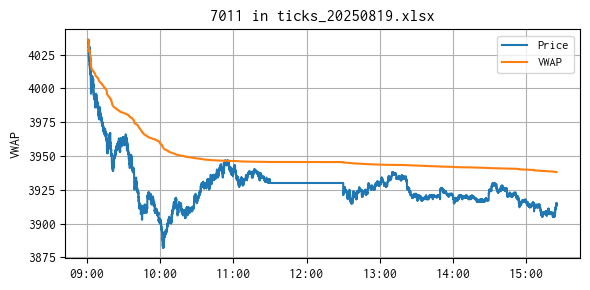

In [48]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(df["Price"], label="Price")
ax.plot(df["VWAP"], label="VWAP")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("VWAP")
ax.grid()
ax.legend(fontsize=9)
ax.set_title(f"{code} in {file}")
plt.tight_layout()
plt.savefig(f"{body}_{code}_vwap.png")
plt.show()

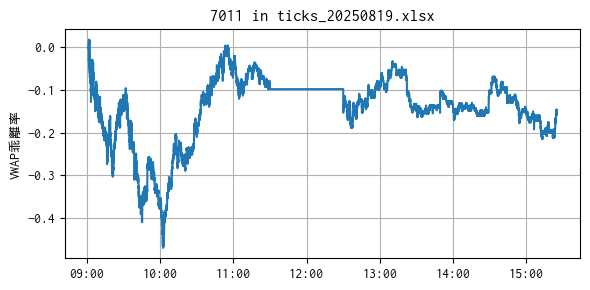

In [49]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(df["VWAPdev"], label="VWAPdev")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("VWAP乖離率")
ax.grid()
# ax.legend(fontsize=9)
ax.set_title(f"{code} in {file}")
plt.tight_layout()
# plt.savefig(f"{body}_{code}_vwapdev.png")
plt.show()